<a href="https://colab.research.google.com/github/ansiyo/Machine-Learning-Rep/blob/main/Soil_moisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

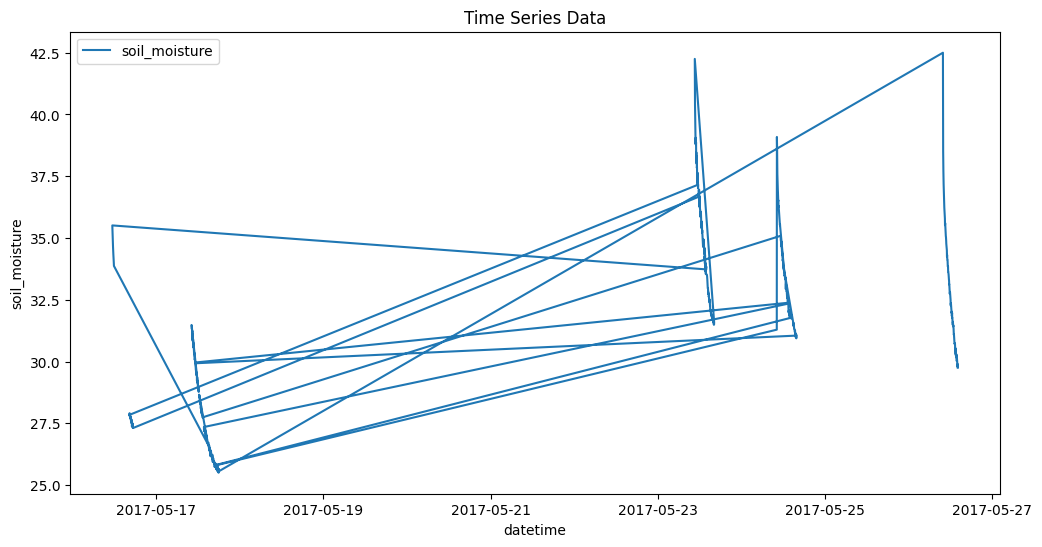

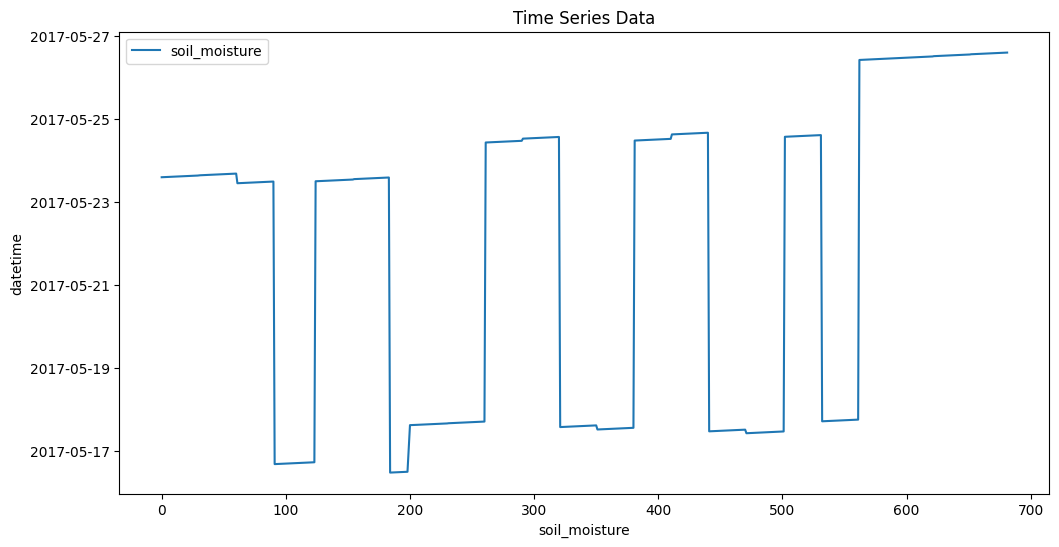

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, parsing the 'Date' column as datetime and setting it as the index
df = pd.read_csv('/content/soilmoisture_dataset.csv', parse_dates=['datetime'], index_col='datetime')

# Handle missing values (choose one of the options below)
# Option 1: Drop rows with missing values
df = df.dropna()
# Option 2: Fill missing values with a specific value (e.g., 0)
# df = df.fillna(0)
# Option 3: Forward fill missing values
# df = df.ffill()

# Visualize the time series data
plt.figure(figsize=(12, 6))
#plt.plot(df['Date'], label='Total')  # Plot 'Total' column against the 'Date' index - This line caused error because 'Date' is now index.
plt.plot(df['soil_moisture'], label='soil_moisture')  # Plot 'Total' column against the 'Date' index (which is now the DataFrame's index)
plt.title('Time Series Data')
plt.xlabel('datetime')
plt.ylabel('soil_moisture')
plt.legend()
plt.show()
# Load the data, parsing the 'Date' column as datetime and setting it as the index
df = pd.read_csv('/content/soilmoisture_dataset.csv', parse_dates=['datetime'], index_col='index')

# Handle missing values (choose one of the options below)
# Option 1: Drop rows with missing values
df = df.dropna()
# Option 2: Fill missing values with a specific value (e.g., 0)
 #df = df.fillna(0)
# Option 3: Forward fill missing values
 #df = df.ffill()

# Visualize the time series data
plt.figure(figsize=(12, 6))
#plt.plot(df['Date'], label='Total')  # Plot 'Total' column against the 'Date' index - This line caused error because 'Date' is now index.
plt.plot(df['datetime'], label='soil_moisture')  # Plot 'Total' column against the 'Date' index (which is now the DataFrame's index)
plt.title('Time Series Data')
plt.xlabel('soil_moisture')
plt.ylabel('datetime')
plt.legend()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679 entries, 0 to 681
Columns: 128 entries, datetime to 950
dtypes: datetime64[ns](1), float64(127)
memory usage: 684.3 KB


In [ ]:
df.shape

(679, 128)

In [ ]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA # Import the ARIMA class


In [ ]:
# Fit an ARIMA model to the time series
# The order (p, d, q) parameters are chosen arbitrarily for this example.
# You should use techniques such as ACF/PACF analysis or grid search to select optimal parameters.
model = ARIMA(df['soil_moisture'], order=(1, 1, 1)) # Fit the model to the 'soil_moisture' column
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Print a summary of the fitted ARIMA model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          soil_moisture   No. Observations:                  679
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1046.946
Date:                Sat, 08 Mar 2025   AIC                           2099.892
Time:                        08:53:40   BIC                           2113.450
Sample:                             0   HQIC                          2105.141
                                - 679                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9524      0.022     42.427      0.000       0.908       0.996
ma.L1         -0.9998      0.144     -6.934      0.000      -1.282      -0.717
sigma2         1.2794      0.191      6.712      0.0

In [ ]:
# Forecast the next 30 time steps
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Print the forecasted values and confidence intervals
print(forecast_df)

soil_moisture       mean   mean_se  mean_ci_lower  mean_ci_upper
679            29.836589  1.131796      27.618310      32.054869
680            29.919061  1.564096      26.853489      32.984633
681            29.997611  1.872663      26.327259      33.667964
682            30.072426  2.114702      25.927685      34.217167
683            30.143683  2.313094      25.610103      34.677263
684            30.211552  2.479935      25.350968      35.072136
685            30.276193  2.622628      25.135936      35.416450
686            30.337760  2.746128      24.955448      35.720072
687            30.396400  2.853966      24.802730      35.990070
688            30.452251  2.948772      24.672764      36.231738
689            30.505446  3.032575      24.561708      36.449184
690            30.556112  3.106979      24.466545      36.645678
691            30.604368  3.173280      24.384854      36.823882
692            30.650329  3.232542      24.314663      36.985996
693            30.694105 

In [ ]:
# Assuming you want to use the fitted ARIMA model (model_fit)
fc, se, conf = model_fit.forecast(30, alpha=0.05)  # 95% conf

# Create a DateTimeIndex for the forecast
# Assuming your data has a daily frequency, you can adjust the frequency as needed
forecast_index = pd.date_range(start=df.index[-1], periods=321 + 1, freq='D')[1:]

# Make as pandas series
fc_series = pd.Series(fc, index=forecast_index) # Use the created index
lower_series = pd.Series(conf[:, 0], index=forecast_index) # Use the created index
upper_series = pd.Series(conf[:, 1], index=forecast_index) # Use the created index

# Assuming you want to plot the entire dataset and the forecast
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df['soil_moisture'], label='soil_moisture') # Plot the original data
plt.plot(fc_series, color = 'orange',label='soil_moisture')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('Soil moisture Prediction')
plt.xlabel('datetime')
plt.ylabel('soil_moisture')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: too many values to unpack (expected 3)

In [ ]:
# Assuming you want to use the fitted ARIMA model (model_fit)
#fc, se, conf = model_fit.forecast(30, alpha=0.05)  # 95% conf # This line is causing the error
fc = model_fit.forecast(30, alpha=0.05)  # Get only the forecast

# Get confidence intervals using get_forecast()
forecast = model_fit.get_forecast(steps=30)
conf = forecast.conf_int(alpha=0.05) # Get confidence intervals separately



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

In [ ]:
# Create a DateTimeIndex for the forecast
# Assuming your data has a daily frequency, you can adjust the frequency as needed
forecast_index = pd.date_range(start=df.index[-1], periods=30 + 1, freq='D')[1:]


In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=forecast_index) # Use the created index
lower_series = pd.Series(conf[:, 0], index=forecast_index) # Use the created index
upper_series = pd.Series(conf[:, 1], index=forecast_index) # Use the created

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=forecast_index) # Use the created index
lower_series = pd.Series(conf.iloc[:, 0].values, index=forecast_index) # Access lower bound values using .iloc[] and .values
upper_series = pd.Series(conf.iloc[:, 1].values, index=forecast_index) # Access upper bound values using .iloc[] and .values

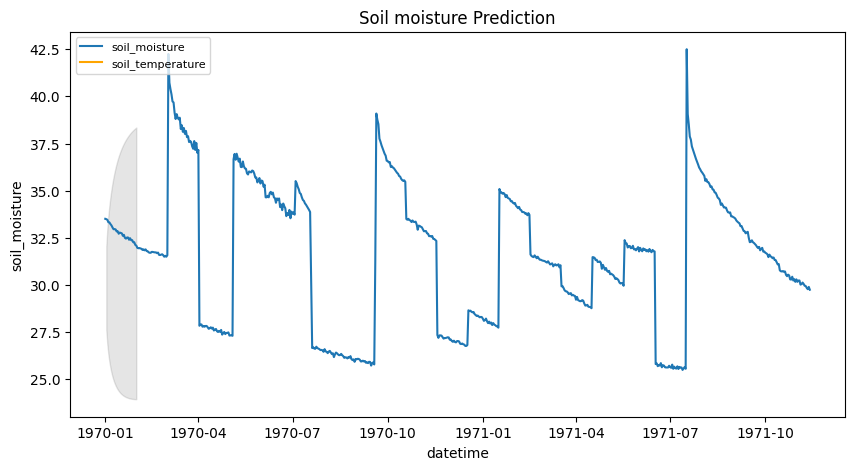

In [ ]:
# Assuming you want to plot the entire dataset and the forecast
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df['soil_moisture'], label='soil_moisture') # Plot the original data
plt.plot(fc_series, color = 'orange',label='soil_temperature')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('Soil moisture Prediction')
plt.xlabel('datetime')
plt.ylabel('soil_moisture')
plt.legend(loc='upper left', fontsize=8)
plt.show()